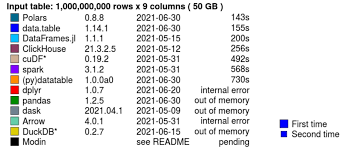

In [1]:
import polars as pl


ModuleNotFoundError: No module named 'polars'

In [2]:
!pip install polars

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 19.3/19.3 MB 1.4 MB/s eta 0:00:00


In [4]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("iris")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.to_csv("iris.csv", index=False)

In [20]:
%%time
import polars as pl

q = (
    pl.scan_csv("iris.csv").
    filter(pl.col("sepal_length") > 5)
    .groupby("species")
    .agg(pl.all().sum())
)

df1 = q.collect()


Wall time: 1.47 ms


In [11]:
df1

species,sepal_length,sepal_width,petal_length,petal_width
str,f64,f64,f64,f64
"""setosa""",116.9,81.7,33.2,6.1
"""versicolor""",281.9,131.8,202.9,63.3
"""virginica""",324.5,146.2,273.1,99.6


In [14]:
%%time
df = pd.read_csv("iris.csv")
df = df[df.sepal_length > 5]
df.groupby('species').agg(['sum'])


Wall time: 7.41 ms


,sepal_length,sepal_width,petal_length,petal_width
,sum,sum,sum,sum
species,,,,
setosa,116.9,81.7,33.2,6.1
versicolor,281.9,131.8,202.9,63.3
virginica,324.5,146.2,273.1,99.6


In [22]:
import numpy as np
df = pd.DataFrame(np.random.randint(1,100,(100,5)), columns=["s1","s2",'s3','s4','s5'])
df.head()

,s1,s2,s3,s4,s5
0,93,71,43,11,84
1,19,58,15,72,66
2,18,70,68,71,56
3,96,15,29,43,25
4,19,39,97,20,89


In [23]:
df.to_csv("subjects_data.csv", index=False)

# Name: Wajeeh Ul Hasan

In [25]:
q = pl.scan_csv("subjects_data.csv")
df = q.lazy().select(
      pl.col('s1'),
    pl.col('s2'),
    pl.col('s3'),
    pl.col('s4'),
    pl.col('s5'),
    (pl.col('s1')+pl.col('s2')+pl.col('s3')+pl.col('s4')+pl.col('s5')).alias('sum_of_columns')
).collect()
print(df)

shape: (100, 6)
┌─────┬─────┬─────┬─────┬─────┬────────────────┐
│ s1  ┆ s2  ┆ s3  ┆ s4  ┆ s5  ┆ sum_of_columns │
│ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ ---            │
│ i64 ┆ i64 ┆ i64 ┆ i64 ┆ i64 ┆ i64            │
╞═════╪═════╪═════╪═════╪═════╪════════════════╡
│ 93  ┆ 71  ┆ 43  ┆ 11  ┆ 84  ┆ 302            │
│ 19  ┆ 58  ┆ 15  ┆ 72  ┆ 66  ┆ 230            │
│ 18  ┆ 70  ┆ 68  ┆ 71  ┆ 56  ┆ 283            │
│ 96  ┆ 15  ┆ 29  ┆ 43  ┆ 25  ┆ 208            │
│ …   ┆ …   ┆ …   ┆ …   ┆ …   ┆ …              │
│ 5   ┆ 37  ┆ 60  ┆ 40  ┆ 15  ┆ 157            │
│ 85  ┆ 50  ┆ 56  ┆ 42  ┆ 86  ┆ 319            │
│ 66  ┆ 71  ┆ 44  ┆ 26  ┆ 45  ┆ 252            │
│ 92  ┆ 26  ┆ 62  ┆ 11  ┆ 35  ┆ 226            │
└─────┴─────┴─────┴─────┴─────┴────────────────┘


In [32]:
q = pl.scan_csv("subjects_data.csv")
df = q.lazy().select(
      pl.col('s1'),
    pl.col('s2'),
    pl.col('s3'),
    pl.col('s4'),
    pl.col('s5'),
    (pl.col('s1')+pl.col('s2')+pl.col('s3')+pl.col('s4')+pl.col('s5')).alias('obtained'),
    (pl.col('s1')/100*100).alias('s1per')

).collect()
print(df)

shape: (100, 7)
┌─────┬─────┬─────┬─────┬─────┬──────────┬───────┐
│ s1  ┆ s2  ┆ s3  ┆ s4  ┆ s5  ┆ obtained ┆ s1per │
│ --- ┆ --- ┆ --- ┆ --- ┆ --- ┆ ---      ┆ ---   │
│ i64 ┆ i64 ┆ i64 ┆ i64 ┆ i64 ┆ i64      ┆ f64   │
╞═════╪═════╪═════╪═════╪═════╪══════════╪═══════╡
│ 93  ┆ 71  ┆ 43  ┆ 11  ┆ 84  ┆ 302      ┆ 93.0  │
│ 19  ┆ 58  ┆ 15  ┆ 72  ┆ 66  ┆ 230      ┆ 19.0  │
│ 18  ┆ 70  ┆ 68  ┆ 71  ┆ 56  ┆ 283      ┆ 18.0  │
│ 96  ┆ 15  ┆ 29  ┆ 43  ┆ 25  ┆ 208      ┆ 96.0  │
│ …   ┆ …   ┆ …   ┆ …   ┆ …   ┆ …        ┆ …     │
│ 5   ┆ 37  ┆ 60  ┆ 40  ┆ 15  ┆ 157      ┆ 5.0   │
│ 85  ┆ 50  ┆ 56  ┆ 42  ┆ 86  ┆ 319      ┆ 85.0  │
│ 66  ┆ 71  ┆ 44  ┆ 26  ┆ 45  ┆ 252      ┆ 66.0  │
│ 92  ┆ 26  ┆ 62  ┆ 11  ┆ 35  ┆ 226      ┆ 92.0  │
└─────┴─────┴─────┴─────┴─────┴──────────┴───────┘


In [36]:
%%time
import polars as pl

q = (
    pl.scan_csv("./subjects_data.csv")
)

df = q.collect()
df

Wall time: 602 µs


s1,s2,s3,s4,s5
i64,i64,i64,i64,i64
93,71,43,11,84
19,58,15,72,66
18,70,68,71,56
96,15,29,43,25
19,39,97,20,89
48,46,7,78,77
70,1,39,97,51
35,60,28,25,7
34,59,86,48,79


In [40]:
import polars as pl


# Calculate the obtained marks
df = df.with_columns(
    pl.col("obtained_marks"),
    pl.col("s1") + pl.col("s2") + pl.col("s3") + pl.col("s4") + pl.col("s5")
)


# Print the final DataFrame
print(df)


ColumnNotFoundError: obtained_marks

Error originated just after this operation:
DF ["s1", "s2", "s3", "s4"]; PROJECT */5 COLUMNS; SELECTION: "None"